Consider the following constrained optimization problem.

$ \text{min} \quad \frac{1}{3}x_1^6 - 2.1x_1^4+4x_2^4+4(x_1^2-x_2^2)+x_1x_2$

$ \text{Sub.to} \quad x_1+x_2 = 0.6228 $

Obtain the minima of the optimization problem. If necessary, use the initial point as $\mathbf{x}^0 = [1,-1]^T$

Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

defining function

In [2]:
f = lambda x1,x2 : (1/3)*(x1**6) - 2.1*(x1**4) + 4*(x2**4) + 4*(x1**2 - x2**2) + x1*x2

defining constranint function

In [3]:
h = lambda x1,x2 : x1 + x2 - 0.6228

defining Lagrangian

In [4]:
leg = lambda x1,x2,lam : f(x1,x2) + lam*h(x1,x2)

defining gradient function

In [5]:
leg_ = lambda x1,x2,lam : np.array([2*(x1**5) - 8.4*(x1**3) + 8*x1 + x2 + lam,16*(x2**3) - 8*x2 + x1 + lam,x1 + x2 - 0.6228],dtype=np.float64)

defining hessian function

In [6]:
leg__ = lambda x1,x2,lam : np.array([[10*(x1**4) - 25.2*(x1**2) + 8, 1, 1],[1, 48*(x2**2) - 8, 1],[1, 1, 0]],dtype=np.float64)

Newton's method

In [7]:
# defining initial point
x = np.array([1.,-1.])
esp = 1e-18
lam = 0

In [8]:
x_pt = [x]
f_pt = [f(x[0],x[1])]
while np.linalg.norm(leg_(x[0],x[1],lam)) > esp:
  delx = (np.linalg.inv(leg__(x[0],x[1],lam))@leg_(x[0],x[1],lam))
  x = x - delx[:-1]
  lam = lam - delx[2]
  x_pt.append(x)
  f_pt.append(f(x[0],x[1]))

In [9]:
print(f'The minima of the optimization problem is {x} ')

The minima of the optimization problem is [ 1.49141503 -0.86861503] 


In [10]:
print(f'The minimum value of the optimization problem is {f(x[0],x[1])} ')

The minimum value of the optimization problem is 0.1392690955280218 


Checking whether constraint is satisfied or not

In [11]:
print(x[0] + x[1] == 0.6228)

True


In [12]:
x1_vals = np.linspace(-1.6, 1.6, 100)
x2_vals = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1_vals, x2_vals)
z = f(x1, x2)

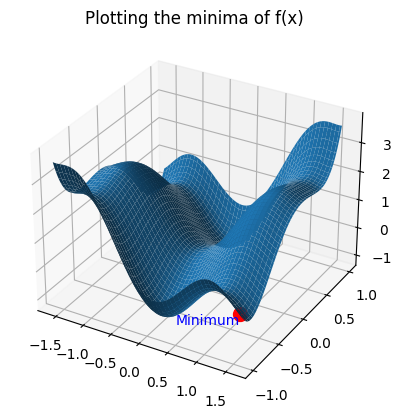

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[0], x[1], f(x[0], x[1]), color='red', s=100)
ax.plot_surface(x1, x2, z)
ax.text(x[0], x[1],f(x[0], x[1]), 'Minimum', color='blue', fontsize=10, ha='right', va='top')
plt.title('Plotting the minima of f(x)')
plt.savefig('fig/Q_newton.png')
plt.show()

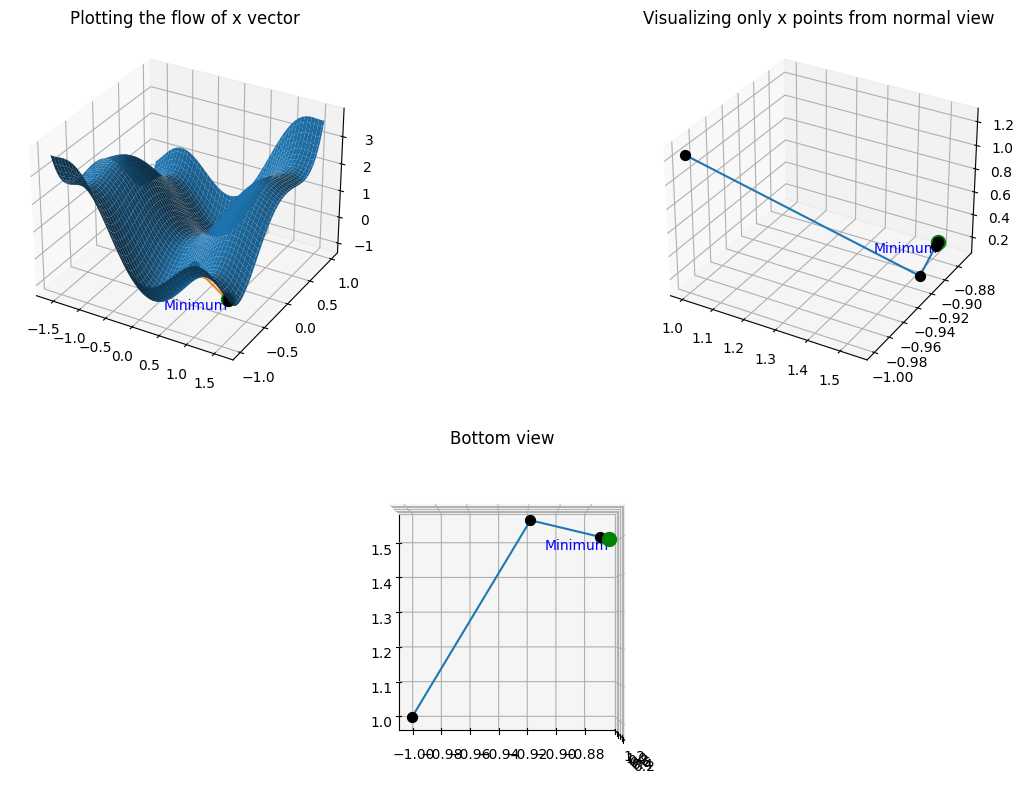

In [14]:
# visualization of plots in different views
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221, projection='3d')
for point in x_pt:
  ax1.scatter(point[0], point[1], f(point[0], point[1]), color='black', s=50)
ax1.plot_surface(x1, x2, z)
ax1.plot(*tuple(zip(*x_pt)), f_pt)
ax1.scatter(x[0], x[1], f(x[0], x[1]), color='green', s=100)
ax1.set_title('Plotting the flow of x vector')
ax1.text(x[0], x[1],f(x[0], x[1]), 'Minimum', color='blue', fontsize=10, ha='right', va='top')

ax2 = fig.add_subplot(222,projection='3d')
for point in x_pt:
  ax2.scatter(point[0], point[1], f(point[0], point[1]), color='black', s=50)
ax2.plot(*tuple(zip(*x_pt)), f_pt)
ax2.scatter(x[0], x[1], f(x[0], x[1]), color='green', s=100)
ax2.set_title('Visualizing only x points from normal view')
ax2.text(x[0], x[1],f(x[0], x[1]), 'Minimum', color='blue', fontsize=10, ha='right', va='top')

ax3 = fig.add_subplot(212,projection='3d')
for point in x_pt:
  ax3.scatter(point[0], point[1], f(point[0], point[1]), color='black', s=50)
ax3.scatter(x[0], x[1], f(x[0], x[1]), color='green', s=100)
ax3.plot(*tuple(zip(*x_pt)), f_pt)
ax3.view_init(elev=-90, azim=0)
ax3.set_title('Bottom view')
ax3.text(x[0], x[1],f(x[0], x[1]), 'Minimum', color='blue', fontsize=10, ha='right', va='top')

plt.savefig('fig/Q_flow.png')
plt.show()